In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [113]:
program_code_1HT = """ 
data {
  int<lower=0> hits; 
  int<lower=0> misses;
  int<lower=0> false_alarms; 
  int<lower=0> correct_rejections; 
  int<lower=0> n_old; 
  int<lower=0> n_new; 
}
parameters {
  real<lower=0,upper=1> d; // probability of detecting an old item
  real<lower=0,upper=1> g; // probability of guessing an item as old
}
model {
  // Priors
    d ~ beta(2, 2); 
    g ~ beta(2, 2); 
  
  // Likelihood
    hits ~ binomial(n_old, d); 
    misses ~ binomial(n_old, 1 - d);
    false_alarms ~ binomial(n_new, g); 
    correct_rejections ~ binomial(n_new, 1 - g); 
  }
"""

In [114]:
#Original List: Drum, Curtain, Bell, Coffee, School, Parent, Moon, Garden, Hat, Farmer, Nose, Turkey, Color, House, River, Desk, Ranger, Mountain, Glasses, Towel
#Modified List:     , Curtain, Bell,       , School, Parent,     , Garden,    ,       , Nose,       , Color,      , River,     ,       , Mountain,        , Towel

stan_dict = {
    'hits' : 7,
    'misses' : 3 ,
    'false_alarms' : 0,
    'correct_rejections' : 10,
    'n_old':20,
    'n_new':20
}

posterior = stan.build(program_code_1HT, data=stan_dict,random_seed=42)

fit = posterior.sample(num_chains=2,num_samples=2500,num_warmup = 1000)

Building...



Building: found in cache, done.Messages from stanc:
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!


In [115]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,0.591,0.073,0.459,0.732,0.001,0.001,4775.0,3329.0,1.0
g,0.274,0.067,0.151,0.400,0.001,0.001,4658.0,3358.0,1.0


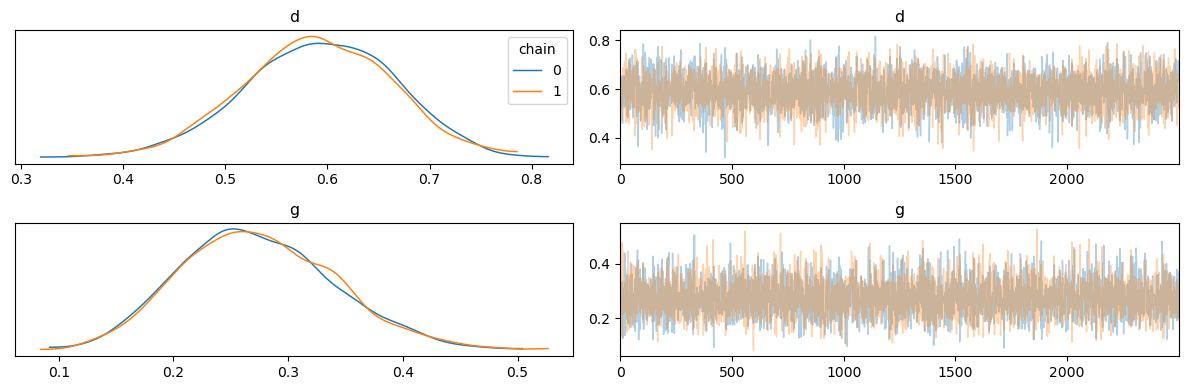

In [116]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

In [117]:
program_code_2HT = """
data {
  int<lower=0> N_old; // Number of old items
  int<lower=0> N_new; // Number of new items
  int<lower=0, upper=N_old> X_old_old; // Number of old items identified as old
  int<lower=0, upper=N_old> X_old_new; // Number of old items identified as new
  int<lower=0, upper=N_new> X_new_old; // Number of new items identified as old
  int<lower=0, upper=N_new> X_new_new; // Number of new items identified as new
}

parameters {
  real<lower=0, upper=1> d; // Detection probability
  real<lower=0, upper=1> g; // Guessing probability
}

model {
  // Priors (Uniform priors are implicitly defined by the parameter bounds)
  
  // Likelihood for old items
  X_old_old ~ binomial(N_old, d + ((1-d) *g ));
  X_old_new ~ binomial(N_old, (1 - d) * (1-g));
  
  // Likelihood for new items
  X_new_old ~ binomial(N_new, (1-d) * g);
  X_new_new ~ binomial(N_new, (1 - d) * (1 - g));
}
"""

In [118]:

stan_dict = {
    'N_old' : 20,
    'N_new' : 20,
    'X_old_old': 7,
    'X_old_new' : 0,
    'X_new_old': 10, 
    'X_new_new': 3
}

posterior = stan.build(program_code_2HT, data=stan_dict,random_seed=42)

fit = posterior.sample(num_chains=2,num_samples=2500,num_warmup = 1000)

Building...



Building: found in cache, done.Messages from stanc:
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000284 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.84 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!


In [119]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,0.251,0.112,0.045,0.46,0.003,0.002,1709.0,1054.0,1.0
g,0.637,0.070,0.509,0.77,0.001,0.001,2326.0,2374.0,1.0


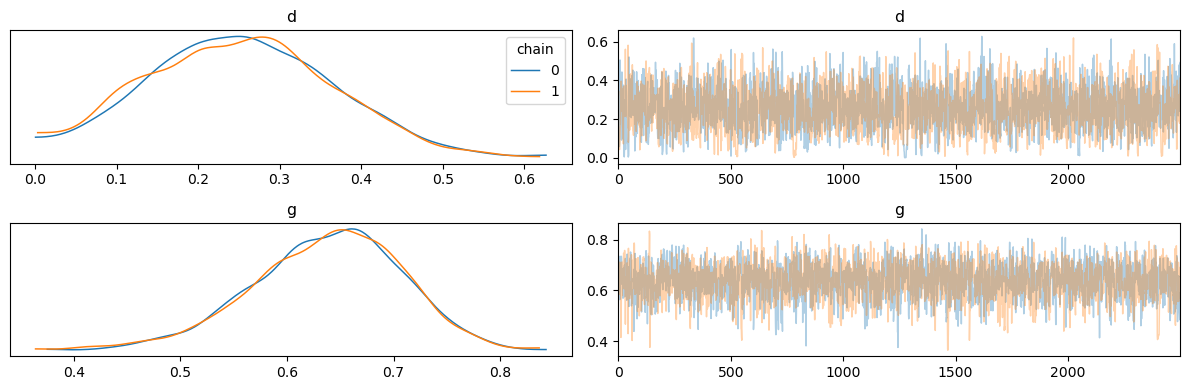

In [120]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()